
# Credit Card Dataset de Kaggle 
### By: Fabio Pinto

This notebook is an example of using clustering for customer segmentation to define a marketing strategy. This sample dataset that summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.

It includes the following variables:

CUST_ID: Identification of Credit Card holder
BALANCE: Balance amount left in their account to make purchases
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1
PURCHASES: Amount of purchases made from account
ONEOFF_PURCHASES: Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES: Amount of purchase done in installment
CASH_ADVANCE: Cash in advance given by the user
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASES INSTALLMENTS FREQUENCY: How frequently purchases in installments are being done (1 =
frequently done, 0 = not frequently done)
CASHADVANCE_FREQUENCY: How frequently the cash in advance being paid
CASHADVANCE_TRX: Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX: Number of purchase transactions made
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user
MINIMUM_PAYMENTS: Minimum amount of payments made by user
PRC_FULL_PAYMENT: Percent of full payment paid by user
TENURE: Tenure of credit card service for user

In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# las de clustering 
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [127]:
datacredit = pd.read_csv("CC GENERAL.csv")
datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [128]:
## let's see the columns with nas
datacredit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [129]:
## We fill the na's on the dataset with the mean of each columns 
mp_mean = datacredit['MINIMUM_PAYMENTS'].mean()
datacredit['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
datacredit['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

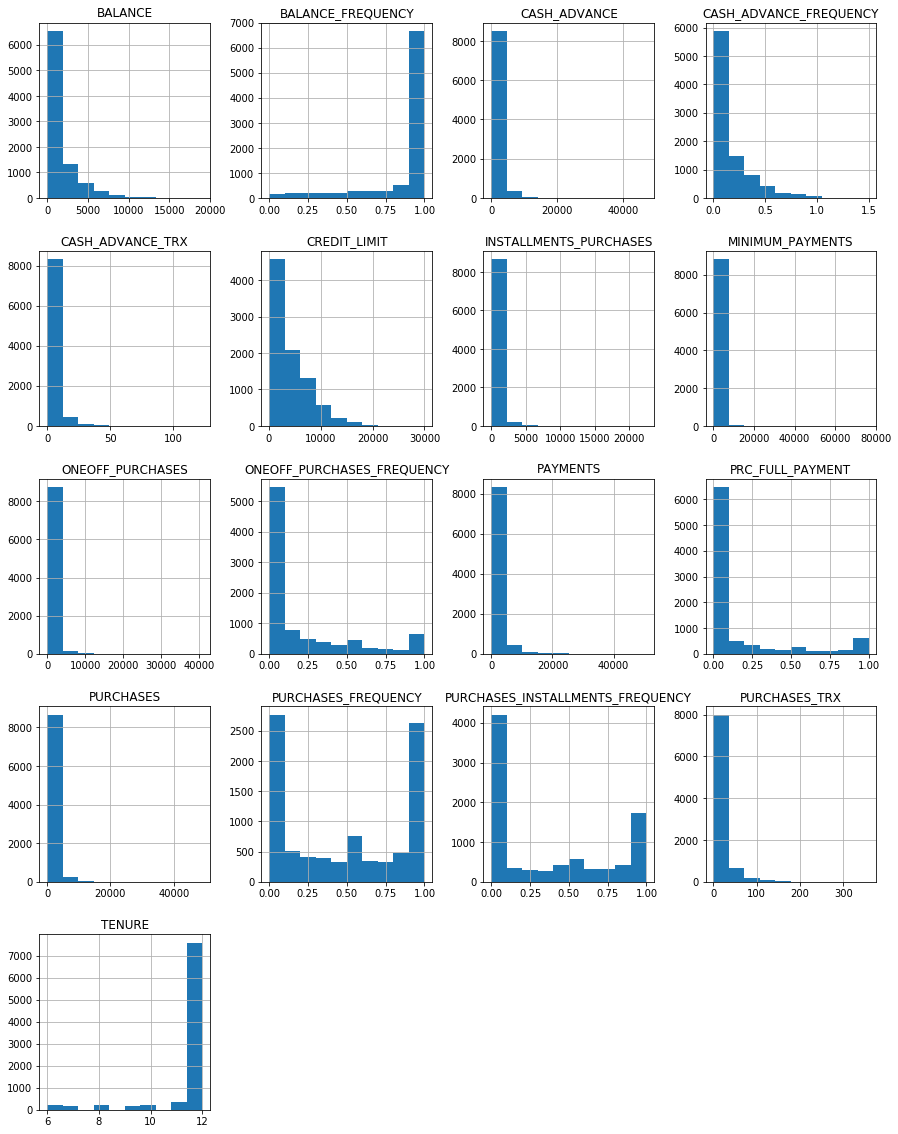

In [12]:
datacredit.hist(figsize = (15,20));

In [130]:
# after the imputation 
datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [131]:
datacredit.drop("CUST_ID", axis = 1, inplace = True)
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [132]:
datacredit.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [16]:
colint = ["CASH_ADVANCE_TRX", "PURCHASES_TRX", "TENURE"]
datacredit.drop(colint, axis = 1, inplace = True)
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000


In [133]:
datacredit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.043837,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.814746,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Processing

In [134]:
## escalamiento 
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

In [135]:
copiadata = escala.fit_transform(datacredit)
datacopia = pd.DataFrame(copiadata, columns= datacredit.columns)
datacopia.head()

C:\Users\FabioPinto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\FabioPinto\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960268,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688712,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826127,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826127,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905302,-0.364368,-2.657913e-01,-0.525551,0.36068


## Model construction

In [136]:

enlaces = linkage(datacopia, method = "ward")
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184170e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59722203e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04443567e+02, 8.95000000e+03]])

In [137]:
len(enlaces)

8949

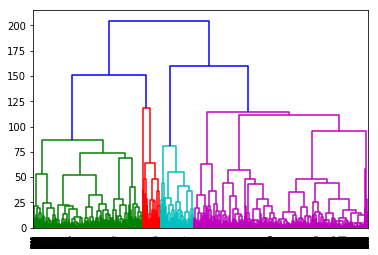

In [138]:
dendrogram(enlaces);

# se identifican 4 clusters 

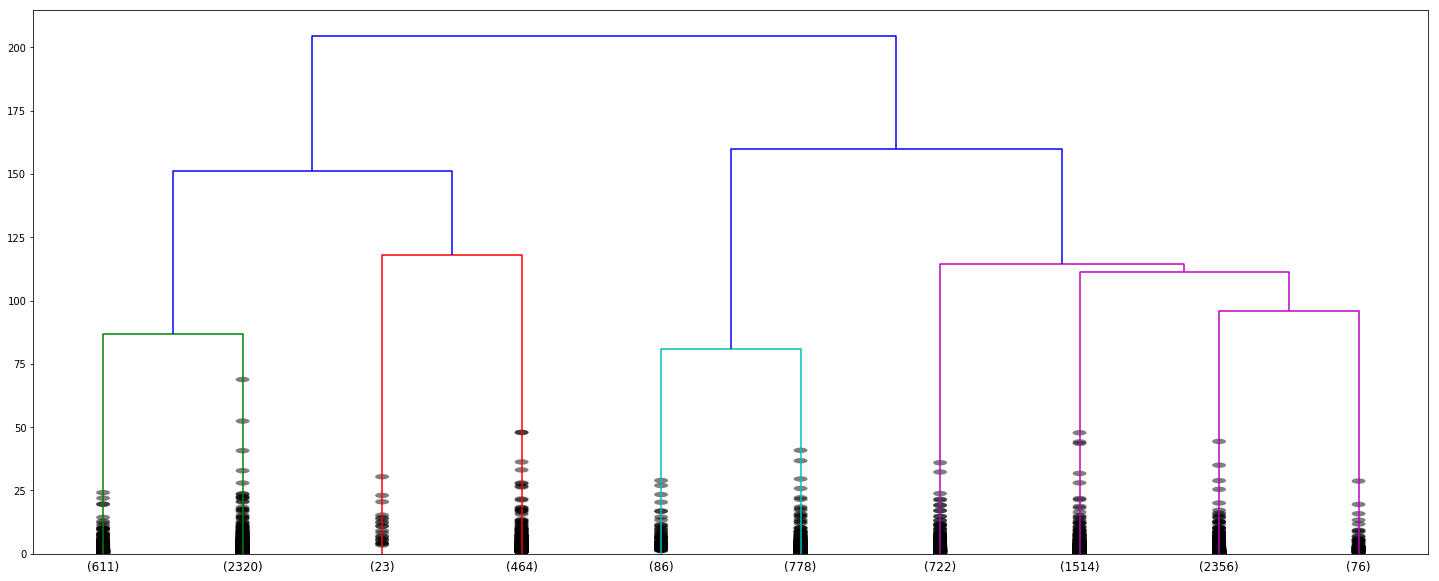

In [139]:
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True) 

## We will see the appropiate number of clusters

In [140]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [141]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[21.97407842, 16.58687827, 31.        ,  3.09829443],
       [23.05749656, 16.53249556, 28.        ,  3.50451442],
       [25.88667273, 20.61648886, 31.        ,  2.9564128 ],
       [21.76025867, 19.74341974, 28.        ,  3.75737336],
       [31.50763933, 24.68266662, 30.        ,  3.23612388],
       [37.02639104, 27.87719018, 31.        ,  2.77866387],
       [28.78505539, 22.40517171, 26.        ,  3.97502651],
       [40.79159594, 32.02223742, 31.        ,  3.44737229],
       [47.04766726, 34.53353805, 30.        ,  3.26275679],
       [66.87810531, 45.03141202, 31.        ,  3.05487782]])

[204.44356716 159.72220287 151.18416997 117.84620684 114.48773208
 111.38380613  95.94365809  86.83752422  80.99586571  73.36511091]
[ 36.18333139 -24.79993023  29.97948837   0.25454881 -12.33622208
   6.33401416   3.26447536  -1.78909629]
2


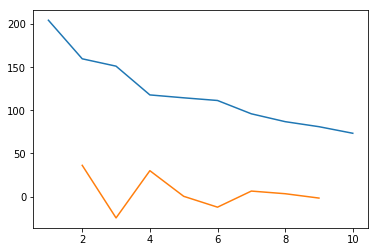

In [142]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

k = acc_rev.argmax()+2
print(k)

In [143]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

In [148]:
## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres


In [149]:
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


### Evaluation and conclussions 

(-5, 30)

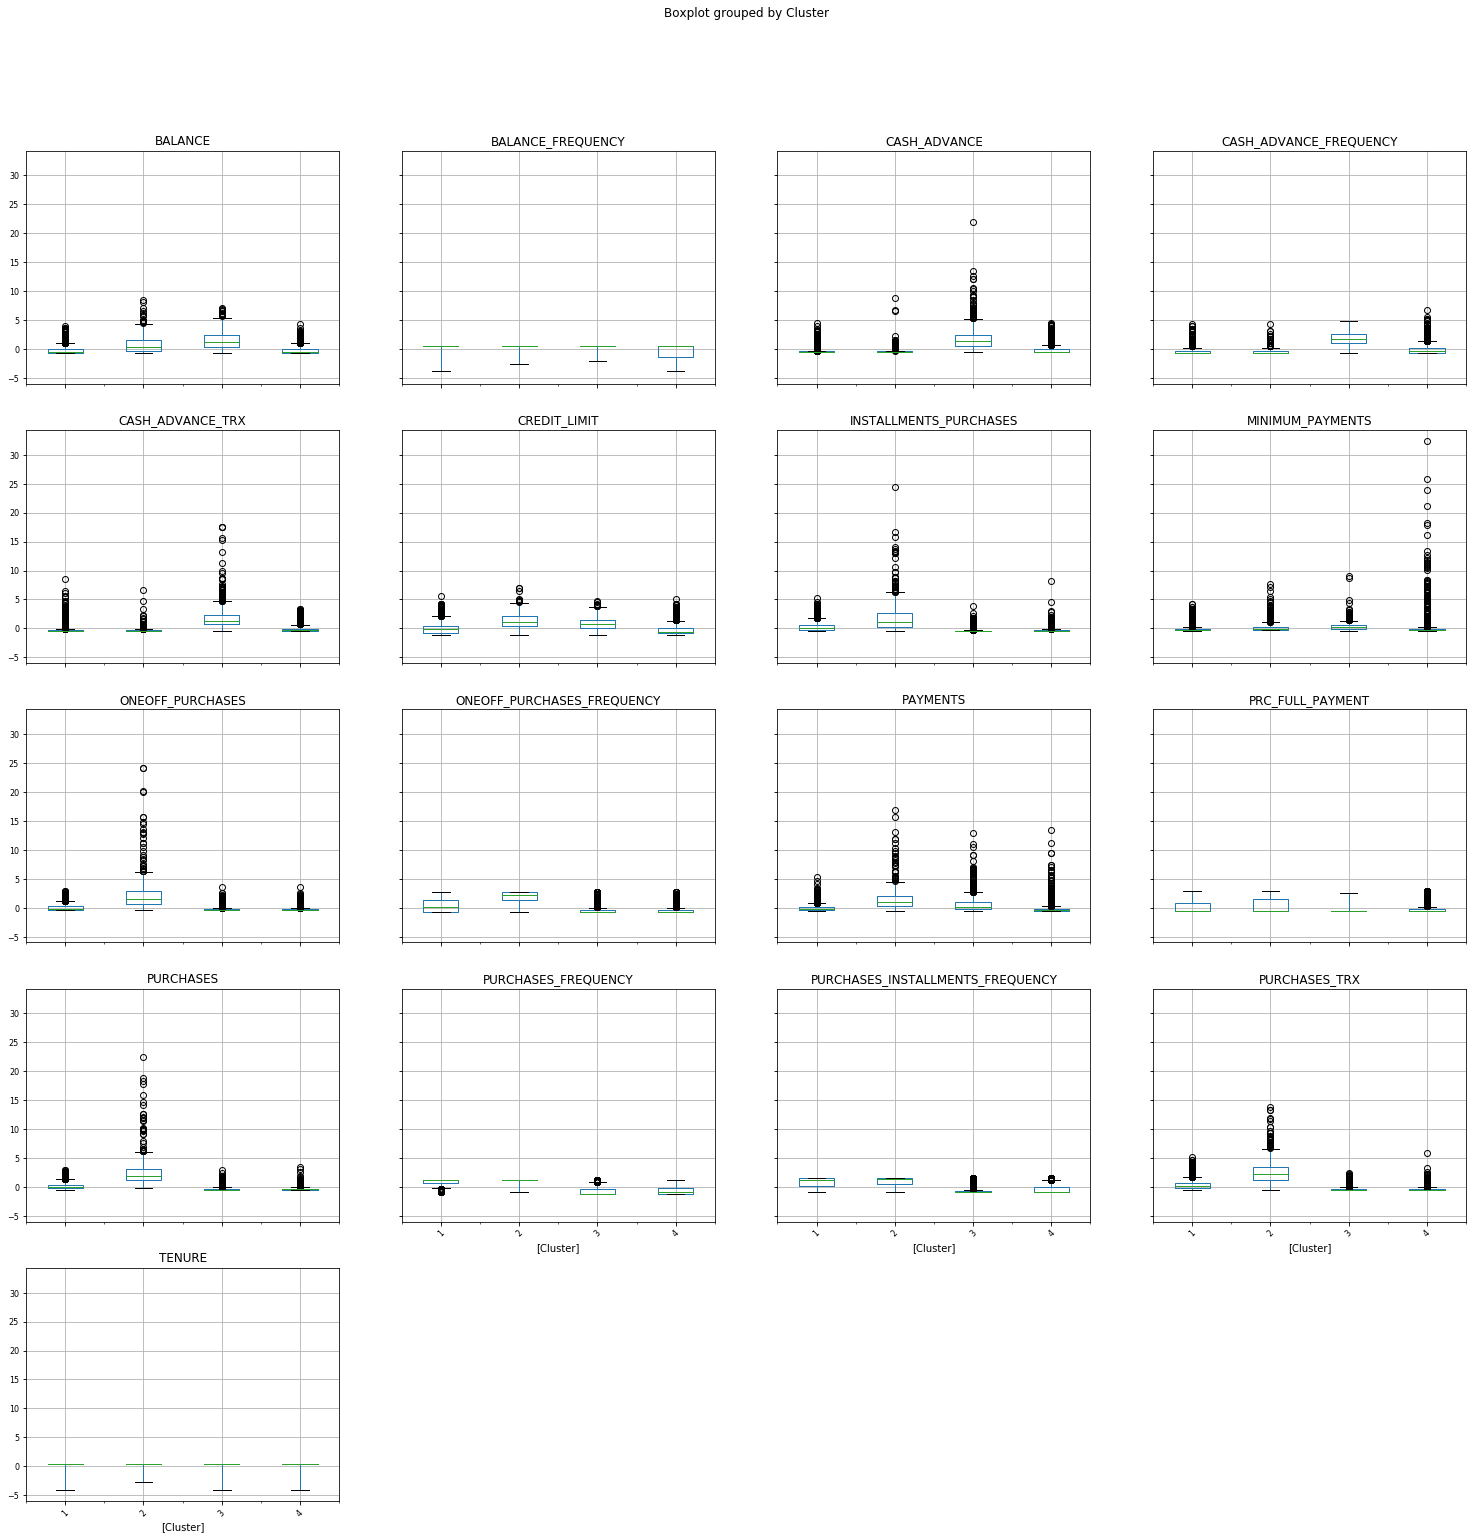

In [150]:

datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1, 30)

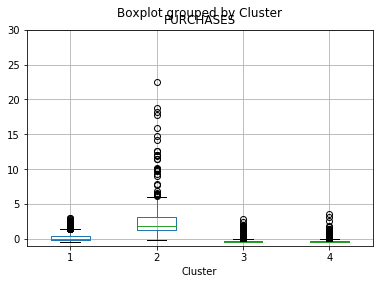

In [152]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

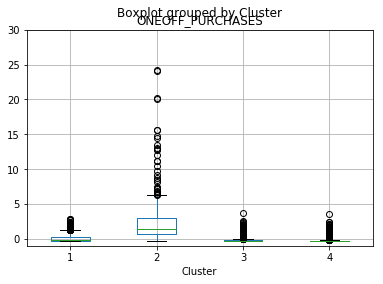

In [153]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

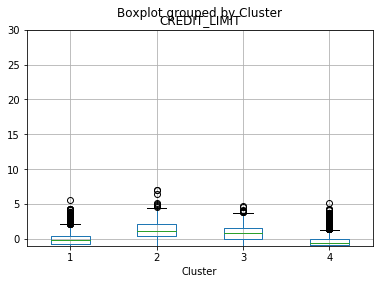

In [155]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1, 20)

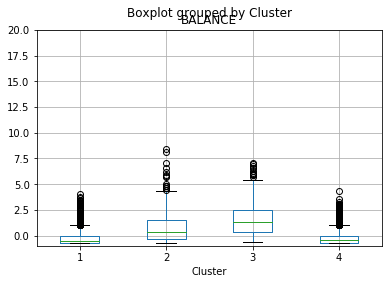

In [167]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

## IDENTIFIED CLUSTERS 

+ CLUSTER 1 - PEOPLE WITH LOW LEVEL OF INCOME. Not Frequent purchases.
+ CLUSTER 2 - PEOPLE WITH MEDIAN LEVEL O INCOME. High Frequent purchases. 
+ CLUSTER 3 - PEOPLE WITH HIGH LEVEL OF INCOME. Not Frequent purchases and the most high advance level. 
+ CLUSTER 4 - PEOPLE WITH LOW LEVEL OF INCOME. Frequent purchases. 